# Class function for QuanQual, UnivariateTable, replace_outliers, FreqTable

In [1]:
import pandas as pd
import numpy as np
#---univariate Class----
class myunivariate():
    #QuanQual list split
    def QuanQual(df):
        quan=[x for x in df if df[x].dtype!=object]
        qual=[x for x in df if df[x].dtype==object]
        return quan,qual
    #--------------------------------------------------
    #create New Table for central Tendency & descriptive
    def UnivariateTable(df,quan):
        import pandas as pd
        import numpy as np
        descriptive=pd.DataFrame(index=["Mean","Median","Mode",
                                        "Min","Q1-25%","Q2-50%","Q3-75%","Max",
                                       "IQR","1.5-Rule","Lower-Bound","Upper-Bound",
                                       "Skew","Kurtosis"]
                                 ,columns=quan)
        for x in quan:
            #print(x)
            descriptive.loc["Mean", x] = round(df[x].mean(), 2)
            descriptive.loc["Median", x] = df[x].median()
            descriptive.loc["Mode", x] = round(df[x].mode()[0], 2)
            descriptive.loc["Min",x]=df.describe().loc['min',x]
            descriptive.loc["Q1-25%",x]=df.describe().loc['25%',x]
            descriptive.loc["Q2-50%",x]=df.describe().loc['50%',x]
            descriptive.loc["Q3-75%",x]=df.describe().loc['75%',x]
            descriptive.loc["Max",x]=df.describe().loc['max',x]
            descriptive.loc["IQR",x]=descriptive.loc["Q3-75%",x]-descriptive.loc["Q1-25%",x]
            descriptive.loc["1.5-Rule",x]=1.5*descriptive.loc["IQR",x]
            descriptive.loc["Lower-Bound",x]=descriptive.loc["Q1-25%",x]-descriptive.loc["1.5-Rule",x]
            descriptive.loc["Upper-Bound",x]=descriptive.loc["Q3-75%",x]+descriptive.loc["1.5-Rule",x]
            descriptive.loc["Skew",x]=df[x].skew()
            descriptive.loc["Kurtosis",x]=df[x].kurtosis()
        #return descriptive
        print("\n-------------- Outlier info --------------\n")
        lesser=[]
        greater=[]
        for x in quan:
            if descriptive.loc["Min",x]<descriptive.loc["Lower-Bound",x]:
                lesser.append(x)
                print(f"Lower outlier in :'{x}' value :", descriptive.loc["Min",x])
            if descriptive.loc["Max",x]>descriptive.loc["Upper-Bound",x]:
                greater.append(x)
                print(f"Upper outlier in :'{x}' value :", descriptive.loc["Max",x])
        print("Lesser outlier :",lesser,"\nGreater outlier:",greater)
        print("\n-------------- Univariate Table  --------------\n")
        return descriptive 
    #---------------------------------------------------
    # Function to replace outliers using np.percentile
    def replace_outliers(df):
        print("\n-------------- Outliers Replaced info --------------\n")
        for col in df.select_dtypes(exclude="object").columns:
            # Q1 (25th percentile) and Q3 (75th percentile)
            #dropna() removes missing values (NaN) before calculating, 
            #Q1 = df[col].quantile(0.25) # other way in panda calculate Q1, Q2
            #Q3 = df[col].quantile(0.75)
            Q1 = np.percentile(df[col].dropna(), 25)
            Q3 = np.percentile(df[col].dropna(), 75)
            IQR = Q3 - Q1
    
            # Bounds
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
    
            # Replace lower outliers with lower bound
            df.loc[df[col] < lower_bound, col] = lower_bound
            
            # Replace higher outliers with upper bound
            df.loc[df[col] > upper_bound, col] = upper_bound
            print(f"{col}: Outliers replaced → lower < {lower_bound:.2f}, upper > {upper_bound:.2f}")
        
        return df
    #---------------------------------------------------
    #create Function for freqtable
    def FreqTable(df,column_name):
        print(f"\n---- Frequency Table for '{column_name}'------\n")
        freqtable = df[column_name].value_counts().reset_index()
        # Rename columns
        freqtable.columns = ["Unique_Values", "Frequency"]
        # Calculate relative frequency
        freqtable["Relative_Frequency"] = freqtable["Frequency"] / freqtable["Frequency"].sum()
        # Cumulative relative frequency
        freqtable["Cumulative_Rel_Freq"] = freqtable["Relative_Frequency"].cumsum()
        # Optional: sort by Frequency
        #freqtable = freqtable.sort_values(by="Frequency").reset_index(drop=True)
        return freqtable 
    

# Call Class and Function 

In [2]:
#from my_class_univariate import myunivariate
import pandas as pd
import numpy as np
dataset = pd.read_csv("Placement.csv")

# Get quantitative and qualitative columns
quan, qual = myunivariate.QuanQual(dataset)
quan.remove("sl_no")
print(quan)

['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']


In [3]:
# Descriptive statistics with outliers
desc = myunivariate.UnivariateTable(dataset,quan)
print(desc)


-------------- Outlier info --------------

Lower outlier in :'hsc_p' value : 37.0
Upper outlier in :'hsc_p' value : 97.7
Upper outlier in :'degree_p' value : 91.0
Upper outlier in :'salary' value : 940000.0
Lesser outlier : ['hsc_p'] 
Greater outlier: ['hsc_p', 'degree_p', 'salary']

-------------- Univariate Table  --------------

                ssc_p     hsc_p  degree_p   etest_p     mba_p     salary
Mean             67.3     66.33     66.37      72.1     62.28  288655.41
Median           67.0      65.0      66.0      71.0      62.0   265000.0
Mode             62.0      63.0      65.0      60.0      56.7   300000.0
Min             40.89      37.0      50.0      50.0     51.21   200000.0
Q1-25%           60.6      60.9      61.0      60.0    57.945   240000.0
Q2-50%           67.0      65.0      66.0      71.0      62.0   265000.0
Q3-75%           75.7      73.0      72.0      83.5    66.255   300000.0
Max              89.4      97.7      91.0      98.0     77.89   940000.0
IQR    

In [4]:
# Replace outliers
cleaned_dataset = myunivariate.replace_outliers(dataset)


-------------- Outliers Replaced info --------------

sl_no: Outliers replaced → lower < -106.00, upper > 322.00
ssc_p: Outliers replaced → lower < 37.95, upper > 98.35
hsc_p: Outliers replaced → lower < 42.75, upper > 91.15
degree_p: Outliers replaced → lower < 44.50, upper > 88.50
etest_p: Outliers replaced → lower < 24.75, upper > 118.75
mba_p: Outliers replaced → lower < 45.48, upper > 78.72
salary: Outliers replaced → lower < 150000.00, upper > 390000.00


In [5]:
# Descriptive statistics without outlier
desc = myunivariate.UnivariateTable(cleaned_dataset,quan)
print(desc)


-------------- Outlier info --------------

Lesser outlier : [] 
Greater outlier: []

-------------- Univariate Table  --------------

                ssc_p     hsc_p  degree_p   etest_p     mba_p     salary
Mean             67.3     66.33     66.36      72.1     62.28  277648.65
Median           67.0      65.0      66.0      71.0      62.0   265000.0
Mode             62.0      63.0      65.0      60.0      56.7   300000.0
Min             40.89     42.75      50.0      50.0     51.21   200000.0
Q1-25%           60.6      60.9      61.0      60.0    57.945   240000.0
Q2-50%           67.0      65.0      66.0      71.0      62.0   265000.0
Q3-75%           75.7      73.0      72.0      83.5    66.255   300000.0
Max              89.4     91.15      88.5      98.0     77.89   390000.0
IQR              15.1      12.1      11.0      23.5      8.31    60000.0
1.5-Rule        22.65     18.15      16.5     35.25    12.465    90000.0
Lower-Bound     37.95     42.75      44.5     24.75     45.48

In [6]:
# Frequency table for all Quan
#freq = myunivariate.FreqTable(cleaned_dataset,"ssc_p")
#print(freq)
for x in quan:
    freq = myunivariate.FreqTable(cleaned_dataset,x)
    print(freq)


---- Frequency Table for 'ssc_p'------

     Unique_Values  Frequency  Relative_Frequency  Cumulative_Rel_Freq
0            62.00         11            0.051163             0.051163
1            63.00         10            0.046512             0.097674
2            67.00          9            0.041860             0.139535
3            73.00          9            0.041860             0.181395
4            52.00          9            0.041860             0.223256
..             ...        ...                 ...                  ...
98           55.68          1            0.004651             0.981395
99           41.00          1            0.004651             0.986047
100          83.33          1            0.004651             0.990698
101          43.00          1            0.004651             0.995349
102          80.60          1            0.004651             1.000000

[103 rows x 4 columns]

---- Frequency Table for 'hsc_p'------

    Unique_Values  Frequency  Relative_Fre

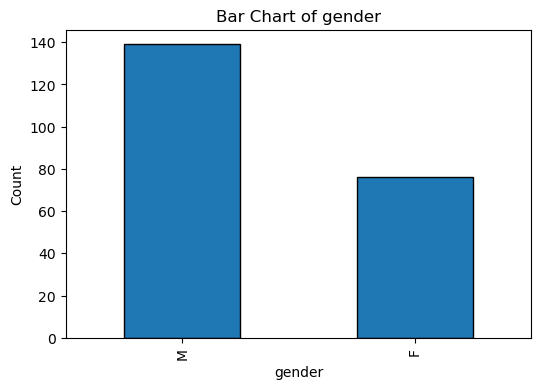

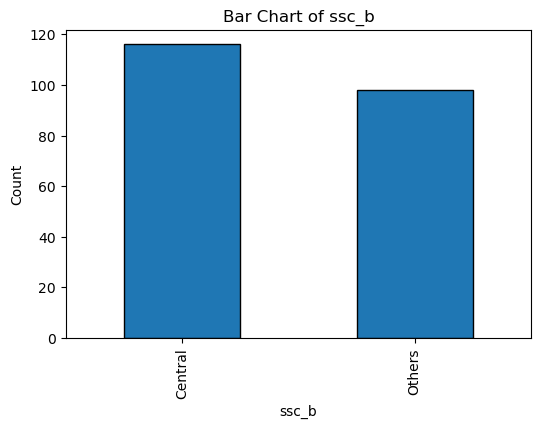

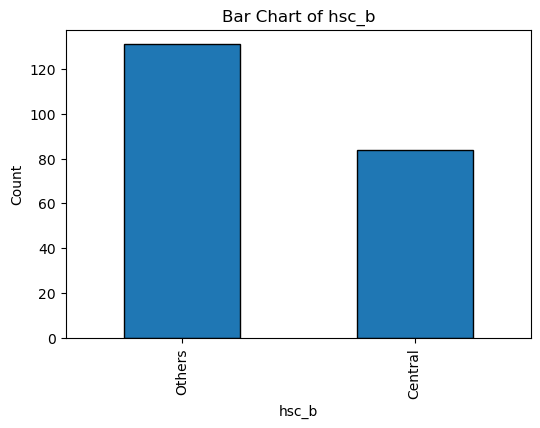

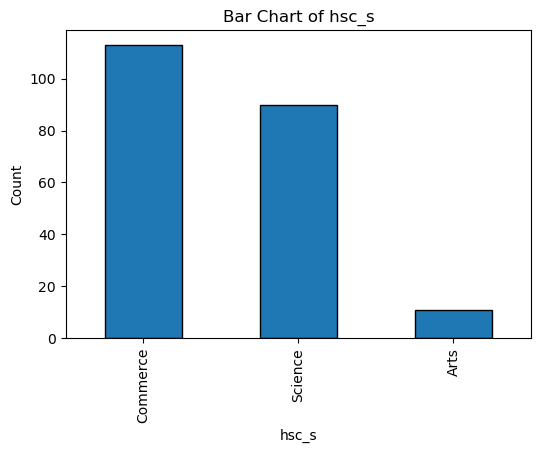

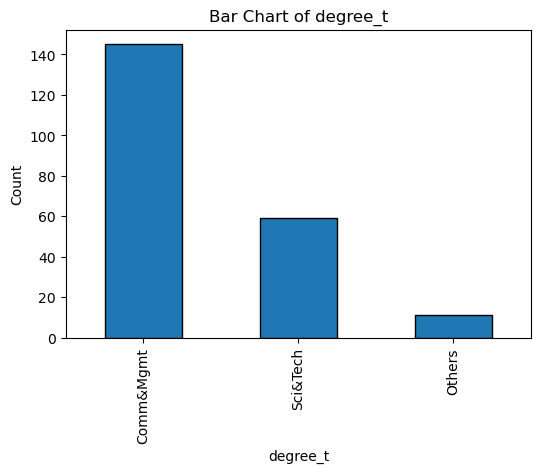

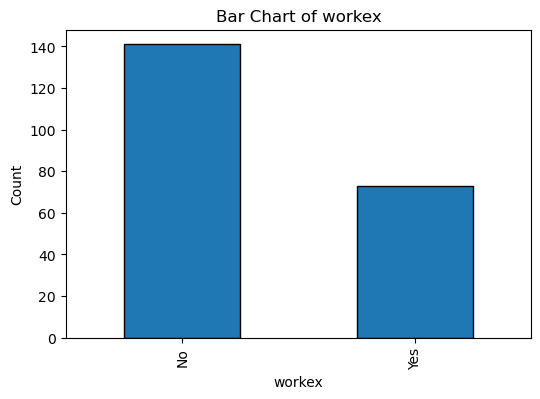

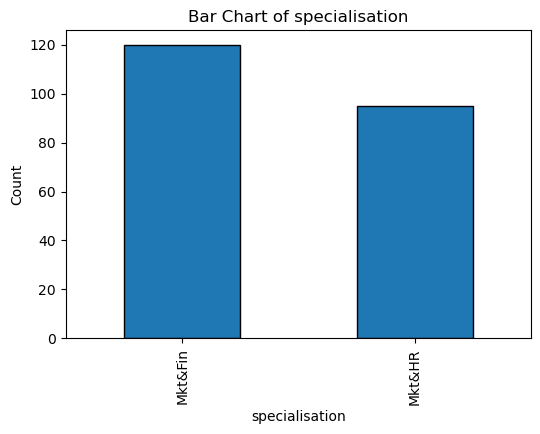

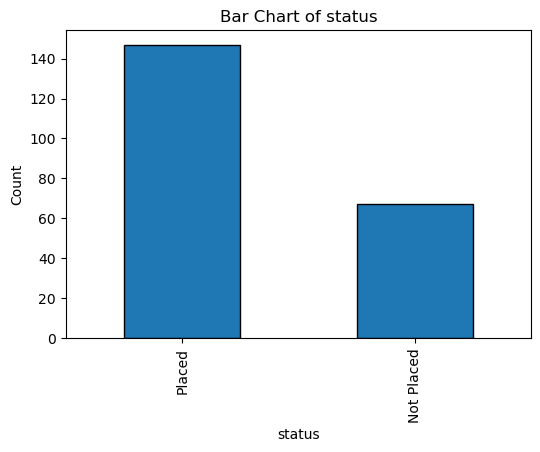

In [7]:
import matplotlib.pyplot as plt
for col in cleaned_dataset.select_dtypes(include="object").columns:
    plt.figure(figsize=(6, 4))
    cleaned_dataset[col].value_counts().plot(kind="bar", edgecolor="black")
    plt.title(f"Bar Chart of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

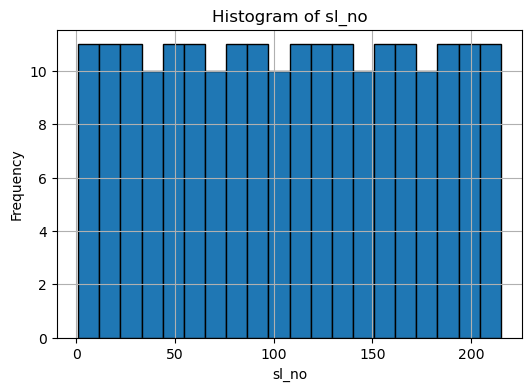

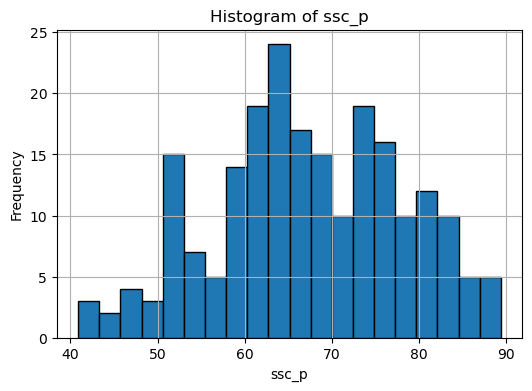

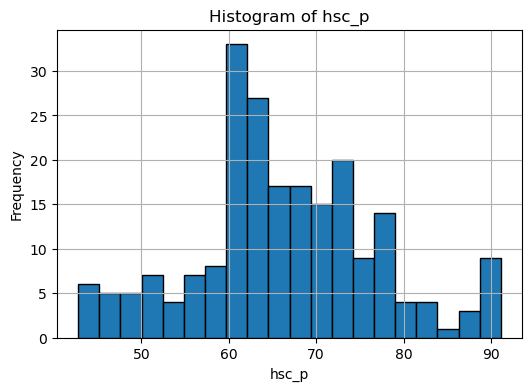

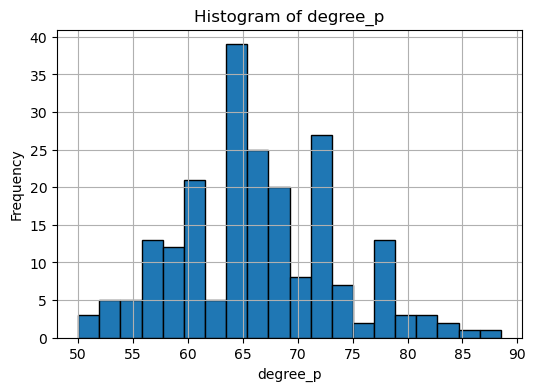

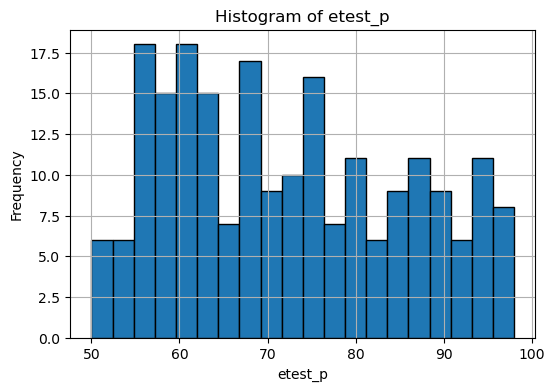

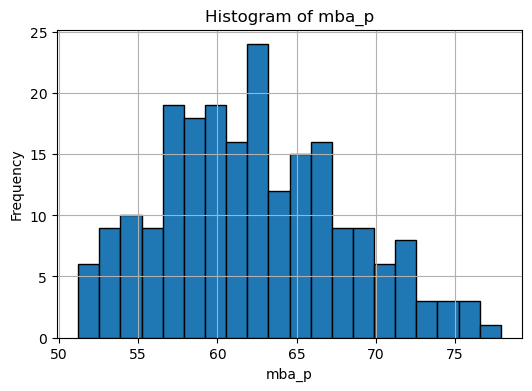

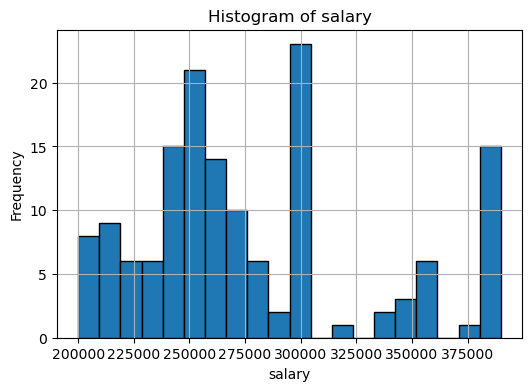

In [8]:
for col in cleaned_dataset.select_dtypes(exclude=object).columns:
    plt.figure(figsize=(6, 4))
    cleaned_dataset[col].hist(bins=20, edgecolor="black")
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()